For each model, first run 20181228_ConfidenceAndChoice_estimation_split.ipynb to organize and save the matrices of data.

In [1]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_name = "New_CAA_const_fN"
num_runs = 10
iter_list = [0, 200, 400, 1600, 6400, 25600, 102400, 204800, 409600, 819200, 1000000, 1228800, 1638400, 2000000, 3000000]#, 4000000, 5000000, 6000000]
max_blobs = 15
min_blobs = 1

num_iters = len(iter_list)
output_size = max_blobs - min_blobs + 1 # 15
img_width = img_height = 100
num_imgs = num_incr = 100

data_directory = "data/" + model_name + "/"

In [3]:
confidence_hist_N = np.load(data_directory + "confidence_hist_N.npy") # [run, i, output_size, output_size]
confidence_msdcv_N = np.load(data_directory + "confidence_msdcv_N.npy") # [run, i, t, 3]
choice_hist_N = np.load(data_directory + "choice_hist_N.npy") # [run, i, output_size, output_size]
choice_msdcv_N = np.load(data_directory + "choice_msdcv_N.npy") # [run, i, t, 3]

confidence_hist_N_incr = np.load(data_directory + "confidence_hist_N_incr.npy") # [run, i, output_size, num_imgs, output_size]
choice_hist_N_incr = np.load(data_directory + "choice_hist_N_incr.npy") # [run, i, output_size, num_imgs, output_size]

In [4]:
confidence_msdcv_N[3,14,:10,0]

array([ 1.00733529,  2.03264802,  3.15990607,  4.28013715,  5.46778755,
        6.55321707,  7.80994072,  8.93020087, 10.2493211 , 11.28881325])

In [5]:
choice_hist_N_incr.shape

(10, 15, 15, 100, 15)

In [6]:
confidence_hist_N_mu = np.mean(confidence_hist_N,axis=0)
confidence_hist_N_incr_mu_each_img = np.mean(confidence_hist_N_incr,axis=0)
confidence_hist_N_incr_mu_all_imgs = np.mean(confidence_hist_N_incr_mu_each_img,axis=2)
choice_hist_N_mu = np.mean(choice_hist_N,axis=0)
choice_hist_N_incr_mu_each_img = np.mean(choice_hist_N_incr,axis=0)
choice_hist_N_incr_mu_all_imgs = np.mean(choice_hist_N_incr_mu_each_img,axis=2)

In [7]:
print(confidence_hist_N_incr_mu_each_img.shape)
print(confidence_hist_N_incr_mu_all_imgs.shape)
print(choice_hist_N_mu.shape)

(15, 15, 100, 15)
(15, 15, 15)
(15, 15, 15)


In [8]:
confidence_hist_N_incr.shape

(10, 15, 15, 100, 15)

In [9]:
print(sum(confidence_hist_N[0,14,10]))

1.0000000023843787


In [10]:
for it, itern in enumerate(iter_list):
    print(sum(confidence_hist_N[8,it,5]))
    print(np.mean([sum(confidence_hist_N_incr[2,it,5,i]) for i in range(num_imgs)]))

0.9999999890454375
1.0000000006511964
1.0000000026382623
0.9999999998696429
1.000000001535518
1.0000000003725509
0.9999999969549662
1.0000000000305287
1.0000000013933725
0.9999999996967311
1.000000000164504
1.0000000001430474
0.9999999949332904
0.9999999993771717
1.0000000035314975
1.000000002046965
1.0000000033715448
1.0000000011699606
1.000000001214754
1.0000000003878013
1.0000000010196692
1.0000000001548477
0.9999999961933588
1.0000000002922491
1.0000000026534128
0.9999999994725208
1.0000000080350733
1.000000000460003
0.9999999977271111
1.0000000004218663


In [11]:
def get_msdcv_incr(hist_matrix):
    """Get the mean, standard deviation, and coefficient of variation matrices from histogram matrix."""
    
    msdcv = np.zeros([num_runs, num_iters, output_size, num_imgs, 3])
    msdcv_all_incr_imgs = np.zeros([num_runs, num_iters, output_size, 3])
    
    for run in range(num_runs):
        for i, it in enumerate(iter_list):
            for t in range(output_size):
                values_sum_all_incr_imgs = 0
                sqr_sum_all_incr_imgs = 0
                
                for j in range(num_imgs):
                    values_sum = 0
                    sqr_sum = 0
#                     print(sum(hist_matrix[run, i, t, j]))

                    # Find the mean
                    for p in range(output_size):
                        values_sum += (p + 1) * hist_matrix[run, i, t, j, p]
                    msdcv[run, i, t, j, 0] = mu = values_sum

                    # Find the standard deviation
                    for p in range(output_size):
                        sqr_sum += (p + 1 - mu)**2 * hist_matrix[run, i, t, j, p]
                    msdcv[run, i, t, j, 1] = sigma = np.sqrt(sqr_sum)

                    # Find the coefficient of variation
                    msdcv[run, i, t, j, 2] = cv = sigma / mu
                    
                    # Add to sum over all numerosity N+1 images
                    values_sum_all_incr_imgs += values_sum / num_imgs
                    sqr_sum_all_incr_imgs += sqr_sum / num_imgs
                    
                msdcv_all_incr_imgs[run, i, t, 0] = mu_all_incr_imgs = values_sum_all_incr_imgs
                msdcv_all_incr_imgs[run, i, t, 1] = sigma_all_incr_imgs = np.sqrt(sqr_sum_all_incr_imgs)
                msdcv_all_incr_imgs[run, i, t, 2] = cv_all_incr_imgs = sigma_all_incr_imgs / mu_all_incr_imgs                    
    return msdcv, msdcv_all_incr_imgs

In [12]:
confidence_msdcv_N_incr, confidence_msdcv_N_incr_all_imgs = get_msdcv_incr(confidence_hist_N_incr)
choice_msdcv_N_incr, choice_msdcv_N_incr_all_imgs = get_msdcv_incr(choice_hist_N_incr)
np.save(data_directory + "confidence_msdcv_N_incr", confidence_msdcv_N_incr)
np.save(data_directory + "confidence_msdcv_N_incr_all_imgs", confidence_msdcv_N_incr_all_imgs)
np.save(data_directory + "choice_msdcv_N_incr", choice_msdcv_N_incr)
np.save(data_directory + "choice_msdcv_N_incr_all_imgs", choice_msdcv_N_incr_all_imgs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: RuntimeWarning:

invalid value encountered in double_scalars



In [13]:
confidence_msdcv_N_mu = np.mean(confidence_msdcv_N,axis=0)
choice_msdcv_N_mu = np.mean(choice_msdcv_N,axis=0)
confidence_msdcv_N_incr_mu_each_img = np.mean(confidence_msdcv_N_incr,axis=0)
choice_msdcv_N_incr_mu_each_img = np.mean(choice_msdcv_N_incr,axis=0)
confidence_msdcv_N_incr_mu_all_imgs = np.mean(confidence_msdcv_N_incr_all_imgs,axis=0)
choice_msdcv_N_incr_mu_all_imgs = np.mean(choice_msdcv_N_incr_all_imgs,axis=0)

In [14]:
confidence_msdcv_N.shape

(10, 15, 15, 3)

In [15]:
choice_msdcv_N_incr_mu_all_imgs[10,:,0]

array([ 1.224 ,  2.5152,  3.9084,  5.3472,  6.7332,  8.106 ,  9.5484,
       11.0556, 12.3408, 13.7964, 15.0996, 15.9132, 16.4568, 16.6644,
       16.7712])

The mean estimates should range from 1 to 15 for N ranging from 1 to 15.

In [16]:
choice_msdcv_N[0,10,:,0]

array([ 1.  ,  2.  ,  3.08,  4.27,  5.35,  6.55,  7.74,  8.9 , 10.37,
       11.29, 12.37, 13.55, 14.52, 14.93, 15.  ])

In [17]:
choice_msdcv_N_mu[10,:,0]

array([ 1.   ,  2.022,  3.107,  4.311,  5.394,  6.624,  7.796,  8.982,
       10.21 , 11.339, 12.471, 13.513, 14.276, 14.699, 14.903])

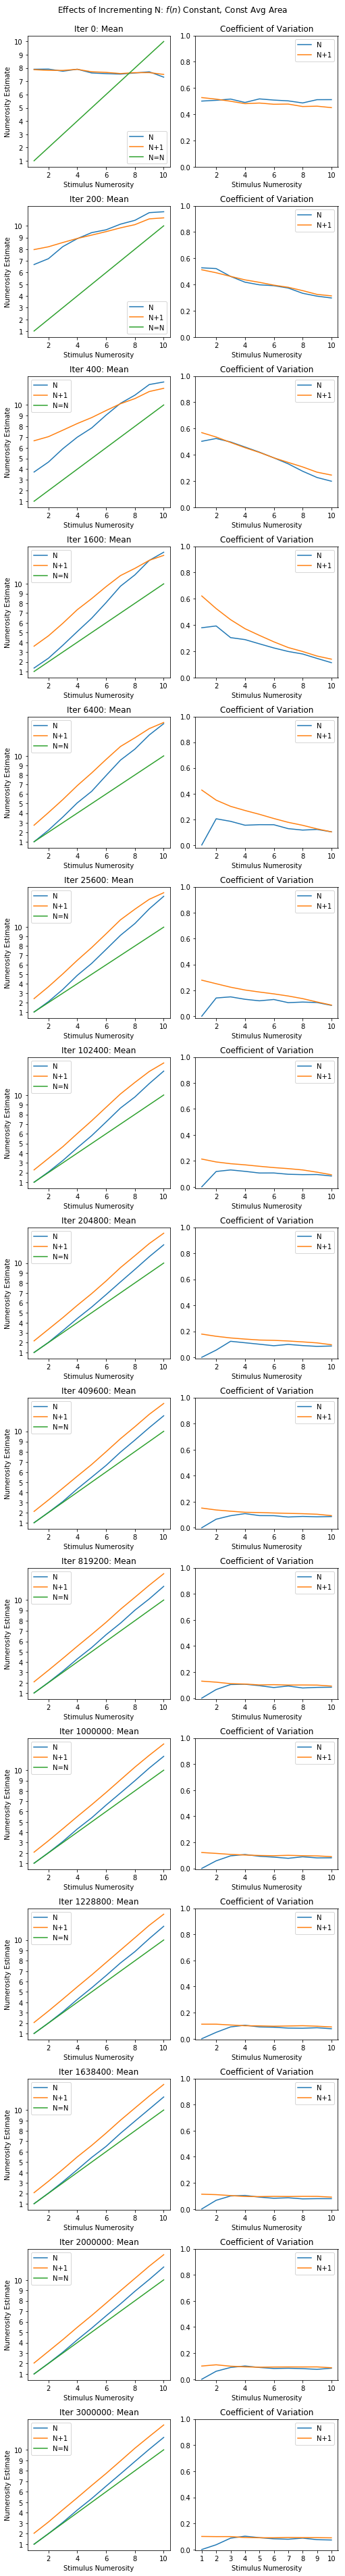

In [18]:
fig, ax = plt.subplots(nrows=len(iter_list), ncols=2, figsize=(3.6*2, 3.6*len(iter_list)))
max_blobs = 10
plt.xticks(np.arange(min_blobs, max_blobs+1, step=1))

for i, iter_num in enumerate(iter_list):
    numerosity = np.arange(min_blobs, max_blobs+1)
    mean = choice_msdcv_N_mu[i,:max_blobs,0]
    mean_incr = confidence_msdcv_N_incr_mu_all_imgs[i,:max_blobs,0]
    cv = choice_msdcv_N_mu[i,:max_blobs,2]
    cv_incr = confidence_msdcv_N_incr_mu_all_imgs[i,:max_blobs,2]

    # Plot Mean.
    ax[i, 0].set_title("Iter %d: Mean" % iter_num)
    ax[i, 0].plot(numerosity, mean, label='N')
    ax[i, 0].plot(numerosity, mean_incr, label='N+1')
    ax[i, 0].plot(numerosity, numerosity, label='N=N')
    ax[i, 0].set_xlabel("Stimulus Numerosity")
    ax[i, 0].set_ylabel("Numerosity Estimate")
    ax[i, 0].set_yticks(np.arange(min_blobs, max_blobs+1, step=1))
    legend = ax[i, 0].legend()
    
    # Plot CV.
    ax[i, 1].set_title("Coefficient of Variation")
    ax[i, 1].plot(numerosity, cv, label='N')
    ax[i, 1].plot(numerosity, cv_incr, label='N+1')
    ax[i, 1].set_xlabel("Stimulus Numerosity")
    ax[i, 1].set_yticks(np.arange(0, 1.2, step=0.2))
    legend = ax[i, 1].legend()
    
fig.tight_layout()    
# fig.suptitle("Effects of Incrementing N: $f(n) \propto 1/n^2$, Decr Avg Area")
fig.suptitle("Effects of Incrementing N: $f(n)$ Constant, Const Avg Area")
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

# Plots

[ 1.356  2.365  3.695  5.099  6.472  8.073  9.758 10.919 12.407 13.244]
[ 1.     2.214  3.596  5.075  6.286  7.939  9.556 10.709 12.194 13.377]
[ 1.     2.102  3.399  4.887  6.155  7.639  9.135 10.383 11.944 13.272]
[ 1.     2.066  3.242  4.551  5.804  7.218  8.657  9.795 11.18  12.464]
[ 1.     2.019  3.199  4.422  5.571  6.825  8.103  9.36  10.645 11.837]
[ 1.     2.022  3.107  4.311  5.394  6.624  7.796  8.982 10.21  11.339]


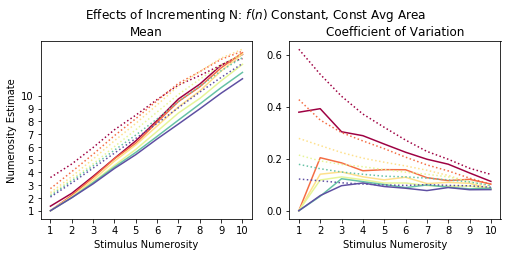

In [19]:
all_iters = [0, 200, 400, 1600, 6400, 6400, 102400, 204800, 409600, 819200, 1000000, 1228800, 1638400, 2000000, 3000000]#, 4000000, 5000000, 6000000]
iters = [1600, 6400, 6400, 102400, 204800, 1000000]
iter_indices = [i for i, iteration in enumerate(all_iters) if iteration in iters]
max_blobs = 10
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(3.6*2, 3.6))
from matplotlib.ticker import MaxNLocator
plt.xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
numerosity = np.arange(min_blobs, max_blobs+1)

ax[0].set_title("Mean")
ax[0].set_xlabel("Stimulus Numerosity")
ax[0].set_ylabel("Numerosity Estimate")
ax[0].set_yticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

ax[1].set_title("Coefficient of Variation")
ax[1].set_xlabel("Stimulus Numerosity")
ax[1].set_yticks(np.arange(0, 1.2, step=0.2))
ax[1].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

for i in iter_indices:
    mean = choice_msdcv_N_mu[i,:max_blobs,0]
    print(mean)
    mean_incr = confidence_msdcv_N_incr_mu_all_imgs[i,:max_blobs,0]
    cv = choice_msdcv_N_mu[i,:max_blobs,2]
    cv_incr = confidence_msdcv_N_incr_mu_all_imgs[i,:max_blobs,2]

    # Plot Mean.
    ax[0].plot(numerosity, mean, label='N')
    ax[0].plot(numerosity, mean_incr, ':', label='N+1')
    
    # Plot CV.
    ax[1].plot(numerosity, cv, label='N')
    ax[1].plot(numerosity, cv_incr, ':', label='N+1')

# legend = ax[i, 1].legend()
fig.tight_layout()    
# fig.suptitle("Effects of Incrementing N: $f(n) \propto 1/n^2$, Decr Avg Area")
fig.suptitle("Effects of Incrementing N: $f(n)$ Constant, Const Avg Area")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [20]:
confidence_msdcv_N_incr_mu_each_img.shape

(15, 15, 100, 3)

In [21]:
np.array([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)])
# np.linspace(0,1,len(iter_indices))

array([0. , 0. , 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])

In [22]:
choice_msdcv_N_incr_all_imgs.shape

(10, 15, 15, 3)

In [23]:
confidence_msdcv_N_incr_mu_all_imgs.shape

(15, 15, 3)

In [24]:
choice_msdcv_N.shape

(10, 15, 15, 3)

# 2/1/2020 Mean, Stdev, and CV

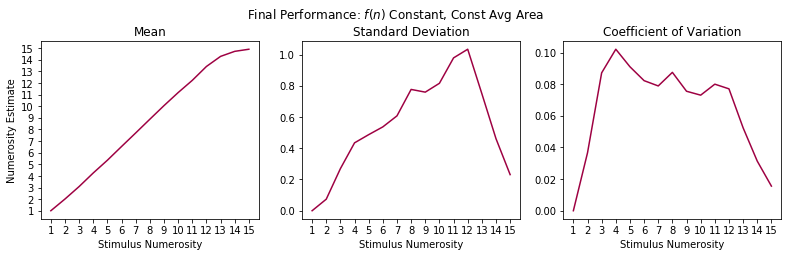

In [25]:
all_iters = [0, 200, 400, 1600, 6400, 6400, 102400, 204800, 409600, 819200, 1000000, 1228800, 1638400, 2000000, 3000000]#, 4000000, 5000000, 6000000]
iters = [3000000]
iter_indices = [i for i, iteration in enumerate(all_iters) if iteration in iters]
max_blobs = 15
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3.7*3, 3.6))
from matplotlib.ticker import MaxNLocator
plt.xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
numerosity = np.arange(min_blobs, max_blobs+1)

ax[0].set_title("Mean")
ax[0].set_xlabel("Stimulus Numerosity")
ax[0].set_ylabel("Numerosity Estimate")
ax[0].set_yticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Stimulus Numerosity")
ax[1].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[1].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

ax[2].set_title("Coefficient of Variation")
ax[2].set_xlabel("Stimulus Numerosity")
ax[2].set_yticks(np.arange(0, 1, step=0.02))
ax[2].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[2].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

for i in iter_indices:
    mean = choice_msdcv_N_mu[i,:max_blobs,0]
    sd = choice_msdcv_N_mu[i,:max_blobs,1]
    cv = choice_msdcv_N_mu[i,:max_blobs,2]

    # Plot Mean.
    ax[0].plot(numerosity, mean, label='N')
    
    # Plot CV.
    ax[1].plot(numerosity, sd, label='N')
    
    # Plot CV.
    ax[2].plot(numerosity, cv, label='N')

# legend = ax[i, 1].legend()
fig.tight_layout()    
# fig.suptitle("Final Performance: $f(n) \propto 1/n^2$, Decr Avg Area")
# fig.suptitle("Final Performance: $f(n) \propto 1/n^2$, Const Avg Area")
# fig.suptitle("Final Performance: $f(n)$ Constant, Decr Avg Area")
fig.suptitle("Final Performance: $f(n)$ Constant, Const Avg Area")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Results/20200201_msdcv_3000000_N/' + model_name + '.png')
plt.show()